In [13]:
# change the current working directory - use relative references later
import os
os.chdir('/home/jovyan/data-512/data-512-final/data-512-final')

Since multiple files are going to be downloaded from the internet.   We'll define a method to retreive the data.

In [14]:
def get_data(zip_file_url):
    """
    Input: Website to extract zip file.
    Output:  Extracted data in '/raw_data' folder
    """
    
    import requests, zipfile, io
    r = requests.get(zip_file_url)
    if r.ok:
        print('Request Succesful.')
    else:
        print('Error submitting request.')
        
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('./raw_data')

In [7]:
# download state by state data, store this in a data frame
BASE_URL = 'https://www.usfinancialcapability.org/downloads/'

file_list = ['NFCS_2018_State_by_State_Tracking_Data_Excel.zip', 'NFCS_2018_Inv_Data_Excel.zip']

for filename in file_list:
    get_data(zip_file_url = BASE_URL + filename)
        
# read the state by state data into a dataframe
df_sbs = pd.read_csv('raw_data/NFCS 2018 State Data 190603.csv')

# read the investor data into a dataframe
df_inv = pd.read_csv('raw_data/NFCS 2018 Investor Data_191107.csv')

Request Succesful.
Request Succesful.


In [1]:
def get_data(zip_file_url):
    """
    Input: Website to extract zip file.
    Output:  Extracted data in '/raw_data' folder
    """
    
    import requests, zipfile, io
    r = requests.get(zip_file_url)
    if r.ok:
        print('Request Succesful.')
    else:
        print('Error submitting request.')
        
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('../raw_data')
    

In [4]:
import requests, zipfile, io
zip_file_url = 'https://www.usfinancialcapability.org/downloads/NFCS_2018_State_by_State_Tracking_Data_Excel.zip'
r = requests.get(zip_file_url)
print(r.ok)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('./raw_data')

True


In [ ]:
import pandas as pd

#pandas support zip file reads
df = pd.read_csv('https://www.usfinancialcapability.org/downloads/NFCS_2018_State_by_State_Tracking_Data_Excel.zip')

In [22]:
import pandas as pd
import numpy as np
import os

# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline

Download the data

Pull in the data.   Create separate dataframes for the state by state data and the investor information.

In [19]:
import pandas as pd
# set the base directory
os.chdir('/home/jovyan/data-512/data-512-final/data-512-final')

# read the data
df_inv = pd.read_csv('raw_data/NFCS 2018 Investor Data 191107.csv')
df_sbs = pd.read_csv('raw_data/NFCS 2018 State Data 190603.csv')

In [21]:
# create a nicer column for gender
df_sbs['Gender'] = df_sbs['A3'].apply(lambda x: 'Male' if x == 1 else 'Female')

# plot the gender distribution
sns.catplot(x="Gender", 
            kind="count", 
            data=df_sbs,
            palette=("Blues"))

NameError: name 'sns' is not defined

Text(0.5, 0.98, 'Do you hold an investment account?')

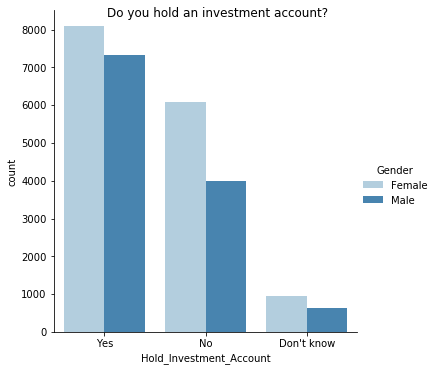

In [23]:
# who has access to an investment account

# create a clean column with labels
def investment_accounts(score):
    if score == 1:
        return 'Yes'
    elif score == 2:
        return 'No'
    else:
        return "Don't know"
        
df_sbs['Hold_Investment_Account'] = df_sbs.apply(lambda x: investment_accounts(x['C1_2012']),axis=1)

# plot the gender distribution
g3 = sns.catplot(x="Hold_Investment_Account", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No", "Don't know"],
            palette=("Blues"))
g3.fig.suptitle('Do you hold an investment account?')

In [27]:
len(df_sbs)

27091

In [26]:
df_sbs[['Gender']].value_counts(normalize=False)

Gender
Female    15135
Male      11956
dtype: int64

In [ ]:
# what percentage of female respondents hold investment accounts?
df_sbs[(df_sbs['Gender'] =='Female')][['Gender','Hold_Investment_Account']].value_counts(normalize=True)

In [ ]:
# what percentage of male respondents hold investment accounts?
df_sbs[(df_sbs['Gender'] =='Male')][['Gender','Hold_Investment_Account']].value_counts(normalize=True)

In [ ]:
%%timeit
df.groupby('city').sales_factor.mean()
df.groupby('city').sales_factor.count()
df.groupby('city').id.first()
3.05 ms ± 65.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
%%timeit
df.groupby("city").agg({"sales_factor": ["mean", "count"], "id": "first"})
4.5 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

We see more females than male in the initial survey.  Let's see some of their responses to determine differing opinions.

In [ ]:
# plot the gender distribution
g = sns.catplot(x="J33_41", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            #title="Discussing my finances can make me feel stressed",
            palette=("Blues"))
#plt.subplots_adjust(top=0.9)
g.fig.suptitle('Discussing My Finances Makes Me Feel Stressed') # can also get the figure from plt.gcf()

In [ ]:
# create a clean column with labels
def investment_knowledge(gender, knowledge):
    if  gender == 'Male' and knowledge in ('1'):
        return 'Partner/Spouse Is More Knowledgeable'
    elif gender == 'Female' and knowledge in ('1'):
        return 'Female Respondent Is Knowledgeable'
    elif  knowledge in ('3'):
        return 'Female Respondent Is Knowledgeable'
    #elif knowledge in ('3'):
    #    return 'Female Respondent Is Knowledgeable'
    elif knowledge == ' ':
        return ''
    else:
        return 'Partner/Spouse Is More Knowledgeable'
        
df_sbs['Investment_Knowledge'] = df_sbs.apply(lambda x: investment_knowledge(x['Gender'], x['A14']),axis=1)


g3 = sns.catplot(y="Investment_Knowledge", 
            kind="count",
            data=df_sbs.where(df_sbs['Investment_Knowledge'] != ''),
            palette=("Blues"))
g3.fig.suptitle('Who knows more about investments?') # can also get the figure from plt.gcf()

In [ ]:
# about 49% of females report being stressed vs %40 of males
df_sbs[(df_sbs['Gender'] =='Female')][['Gender','Stressed']].value_counts(normalize=True)

In [ ]:
df_sbs[['Gender', 'C2_2012', 'Account_Owner']]

Difficult to get much information from this.   Lots of respondents don't know who owns the account.  Also we don't have the gender of the respondent's spouse, so it's difficult to say.

In [ ]:
# create a clean column with labels
def who_owns_account(gender, owner):
    if owner in ('3') or (gender == 'Female' and owner in ('1')):
        return 'Female Respondent Owns Account'
    elif  gender == 'Female' and owner in ('2'):
        return "Female's Partner Owns Account"
    elif  gender == 'Male' and owner in ('2'):
        return 'Unknown'
    elif  gender == 'Male' and owner in ('1'):
        return 'Male Owns Account'
    elif  owner in ('98','99', ' '):
        return 'Unknown'
        
df_sbs['Account_Owner'] = df_sbs.apply(lambda x: who_owns_account(x['Gender'], x['C2_2012']),axis=1)


g3 = sns.catplot(y="Account_Owner", 
            kind="count",
            data=df_sbs.where(df_sbs['C1_2012'] == 1),
            order=["Female Respondent Owns Account", 'Male Owns Account', "Female's Partner Owns Account", "Unknown"],
            palette=("Blues"))
g3.fig.suptitle('Who owns the account?')

In [ ]:
# plot the gender distributiondf
g3 = sns.catplot(x="Account_Owner", 
            kind="count",
            #hue='Gender',
            data=df_sbs.where(df_sbs['Account_Owner'] != ''),
            palette=("Blues"))
g3.fig.suptitle('Who owns the account?') # can also get the figure from plt.gcf()

In [ ]:
df_sbs[(df_sbs['C1_2012'] == 1)][['Account_Owner']].value_counts(normalize=True)

In [ ]:
# only 33% of the women actually own the account directly.   About 42% of the male respondents said they own it
pd.DataFrame(df_sbs[(df_sbs['Account_Owner'] !='')]['Account_Owner'].value_counts(normalize=True))

In [ ]:
sns.barplot(x='group', y='Values', data=df, estimator=lambda x: sum(x==0)*100.0/len(x))

In [ ]:
df_sbs['Gender']

In [ ]:
df_sbs['C2_2012']

---

In [ ]:
# preview the results
df_sbs.head()

Define "participation" in the following ways:

* Primary decision maker (otherwise, they may just coincidentally have accounts) 
  A1 = 1 OR 2
* Hold investments in retirement accounts (e.g., 401(k), IRA, etc.)
A2

In [ ]:
# lets define participation as holding a retirement investment account or a private investment account


In [ ]:
# visuals

# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline

In [ ]:
# plot the gender distribution
sns.catplot(x="S_Gender", 
            kind="count", 
            data=df_inv,
           # order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
            palette=("Blues"))

In [ ]:
# let's see if women participate in investments less!
# plot the gender distribution
sns.catplot(x="decision_maker", 
            kind="count",
            #hue='S_Gender',
            data=df_inv,
           # order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
            palette=("Blues"))

In [ ]:
df_inv.loc[~df_inv['A2'].isin([1,2])]

In [ ]:
# create new column to identify decision makers
df_inv['decision_maker'] = 0
df_inv.loc[df_inv['A1'].~isin([1,2]),'decision_maker']=1


In [ ]:
df_inv.loc[df_inv['decision_maker']==0]

In [ ]:
# we see slightly more men than women in the survey.

# let's create a new column to identify participants
df_inv.loc[df_inv['A1'].isin([1,2]) & 
           ((df_inv['A2']==1) | (df_inv['A3']==1)),
           'participant']=1

In [ ]:
df_inv.loc[df_inv['A1'].isin([1,2]) & ((df_inv['A2']==1) | (df_inv['A3']==1)) ].head(10)

In [ ]:
# plot education distribution
sns.catplot(y="education", 
            kind="count", 
            data=toxicity_worker_demographics,
            order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
            palette=("Blues"))

# plot gender dist
sns.catplot(x="gender", 
            kind="count", 
            data=toxicity_worker_demographics,
            palette=("Blues"))

# plot age group dist
sns.catplot(x="age_group", 
            kind="count", 
            data=toxicity_worker_demographics,
            order=["Under 18", "18-30", "30-45", "45-60", "Over 60"],
            palette=("Blues"))

# plot language dist
sns.catplot(x="english_first_language", 
            kind="count", 
            data=toxicity_worker_demographics,
            palette=("Blues"))

plt.tight_layout()

In [ ]:
# join the labels and comments
toxicity_annotated_comments['labeled_toxic'] = toxicity_labels

In [ ]:
# preview the results
toxicity_annotated_comments.loc[toxicity_annotated_comments['labeled_toxic'] == True].head(10)

In [ ]:
# join demographics to annotations
joined_toxicity_demographics = toxicity_annotations.join(toxicity_worker_demographics, on="worker_id", rsuffix="_r")

In [ ]:
# calculate average toxicity per user
avg_worker_toxicity = joined_toxicity_demographics.groupby("worker_id")["toxicity_score"].mean()

# join the average toxicity to the demographics table
toxicity_worker_demographics = toxicity_worker_demographics.join( avg_worker_toxicity )

# preview the results
toxicity_worker_demographics.head()

In [ ]:
# create barplot, specify the order
sns.barplot(y="education", 
                 x="toxicity_score", 
                 data=toxicity_worker_demographics, 
                 order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
                 palette=("Blues"))

# save results for README file
fig = sns_plot.get_figure()
fig.savefig('output.png')